In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster import hierarchy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
Dry_Beans = pd.read_csv('train.csv')

In [3]:
Dry_Beans_test = pd.read_csv('test.csv')

In [23]:
Dry_Beans.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [7]:
Dry_Beans_test

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,13538,66833,1018.336,400.397077,214.346215,1.867992,0.844640,67787,291.709476,0.759604,0.985927,0.809876,0.728550,0.005991,0.001041,0.530786,0.991504
2705,13539,40572,725.331,250.714014,206.471935,1.214276,0.567264,40900,227.283688,0.767479,0.991980,0.969089,0.906546,0.006179,0.002574,0.821825,0.997923
2706,13540,61226,1008.378,408.227467,199.385082,2.047432,0.872611,63901,279.204879,0.611648,0.958138,0.756657,0.683944,0.006668,0.000900,0.467780,0.957748
2707,13541,34238,698.847,255.829224,170.867099,1.497241,0.744255,34724,208.789788,0.724890,0.986004,0.880956,0.816130,0.007472,0.002045,0.666067,0.997263


# Feature Engineering

In [24]:
Dry_Beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [25]:
Dry_Beans.describe()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,5416.500000,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,3127.650742,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,0.000000,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,2708.250000,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,5416.500000,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,8124.750000,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,10833.000000,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [7]:
duplicate=Dry_Beans[Dry_Beans.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y


In [8]:
Dry_Beans = Dry_Beans.reset_index(drop=True)

In [9]:
Dry_Beans.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


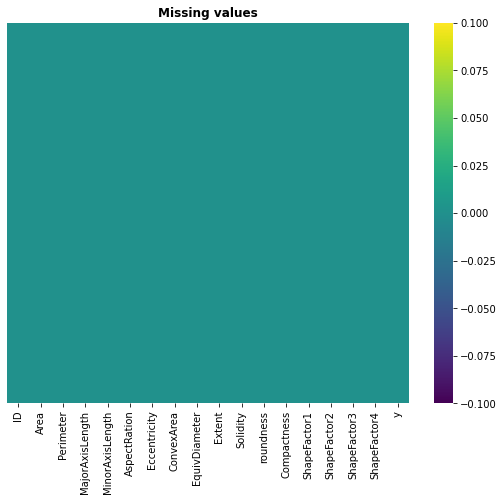

In [10]:
plt.figure(figsize=(9,7))
plt.title('Missing values', fontweight='bold')

ax = sns.heatmap(Dry_Beans.isnull(),yticklabels=False,cbar='viridis',cmap='viridis')

plt.show()

ID                    AxesSubplot(0.125,0.657941;0.110714x0.222059)
Area               AxesSubplot(0.257857,0.657941;0.110714x0.222059)
Perimeter          AxesSubplot(0.390714,0.657941;0.110714x0.222059)
MajorAxisLength    AxesSubplot(0.523571,0.657941;0.110714x0.222059)
MinorAxisLength    AxesSubplot(0.656429,0.657941;0.110714x0.222059)
AspectRation       AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Eccentricity          AxesSubplot(0.125,0.391471;0.110714x0.222059)
ConvexArea         AxesSubplot(0.257857,0.391471;0.110714x0.222059)
EquivDiameter      AxesSubplot(0.390714,0.391471;0.110714x0.222059)
Extent             AxesSubplot(0.523571,0.391471;0.110714x0.222059)
Solidity           AxesSubplot(0.656429,0.391471;0.110714x0.222059)
roundness          AxesSubplot(0.789286,0.391471;0.110714x0.222059)
Compactness              AxesSubplot(0.125,0.125;0.110714x0.222059)
ShapeFactor1          AxesSubplot(0.257857,0.125;0.110714x0.222059)
ShapeFactor2          AxesSubplot(0.390714,0.125

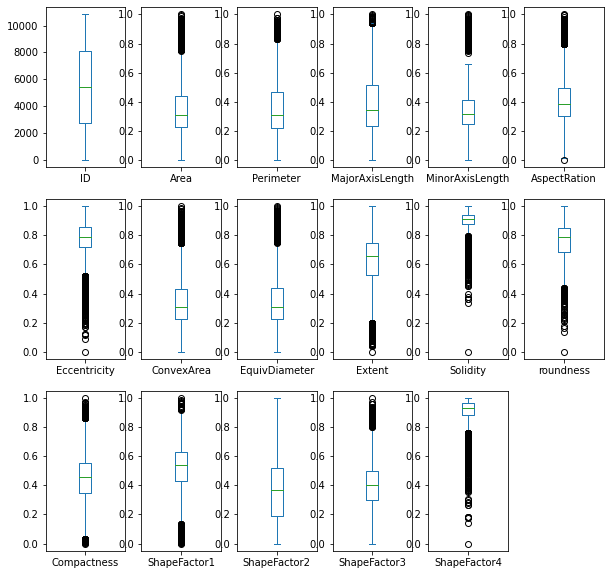

In [19]:
Dry_Beans.plot(kind="box", subplots=True, layout=(3,6), figsize=(10,10))

In [4]:
features = Dry_Beans.drop(columns = ['ID', 'y']).columns
label = Dry_Beans['y']


In [15]:
features

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [16]:
#features.plot(kind="box", subplots=True, layout=(3,6), figsize=(10,10))

In [18]:
# f, axes = plt.subplots(len(features.columns), figsize = (20,60))
# for index,col in enumerate(features.columns):
#     sns.histplot(data=Dry_Beans[col], ax=axes[index])

In [19]:

# from matplotlib import pyplot
# #cols = list(features.columns)
# quantile = QuantileTransformer(output_distribution='normal')
# features.values[:] = quantile.fit_transform(features)
# pyplot.hist(features.values[:], bins=30)
# pyplot.show()



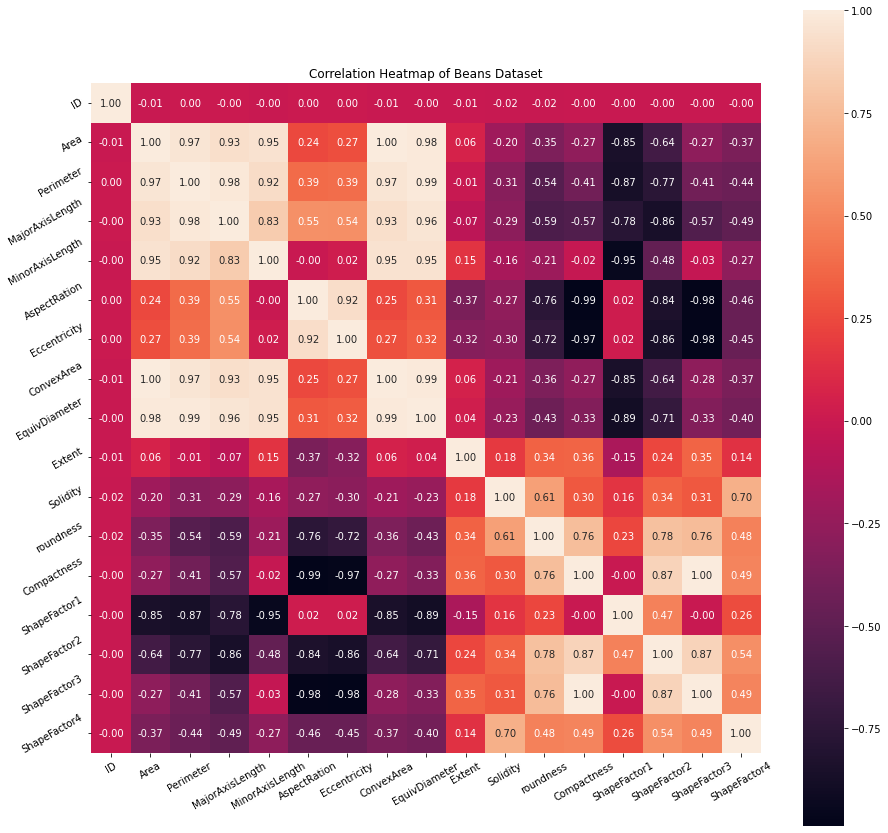

In [12]:
corr_matrix = Dry_Beans.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Beans Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [13]:
feature_columns = [x for x in Dry_Beans.columns]
skew = (Dry_Beans[feature_columns].skew().sort_values(ascending=False))
skew = skew.loc[skew > 0.8]
skew

C:\Users\faiza\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Area               2.970246
ConvexArea         2.960315
MinorAxisLength    2.251468
EquivDiameter      1.971378
Perimeter          1.650773
MajorAxisLength    1.390286
dtype: float64

In [7]:
for col in skew.index.tolist():
    Dry_Beans[col] = np.log1p(Dry_Beans[col])

scalar = StandardScaler()
Dry_Beans[features] = scalar.fit_transform(Dry_Beans[features])

NameError: name 'skew' is not defined

In [4]:
# from sklearn import preprocessing
# from sklearn.model_selection import train_test_split
# features = Dry_Beans.drop(columns = ['ID', 'y']).columns
# label = Dry_Beans['y']
# scaler=preprocessing.MinMaxScaler()
# Dry_Beans[features] =scaler.fit_transform(Dry_Beans[features])
# Dry_Beans.head()


,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,0.161480,0.305642,0.384688,0.178526,0.806323,0.962493,0.157859,0.272126,0.159036,0.904445,0.570991,0.117547,0.563053,0.117763,0.095822,0.978144,HOROZ
1,1,0.102884,0.159315,0.147660,0.262615,0.158649,0.541875,0.099333,0.188244,0.696185,0.992108,0.967937,0.734115,0.441765,0.584350,0.693236,0.954606,SEKER
2,2,0.048003,0.088228,0.101396,0.120882,0.292923,0.715573,0.046789,0.096876,0.791600,0.916611,0.880589,0.560232,0.670512,0.557595,0.508634,0.961666,DERMASON
3,3,0.078387,0.143168,0.152803,0.169553,0.317879,0.738483,0.076363,0.149359,0.678145,0.925168,0.827875,0.533333,0.577583,0.464513,0.481208,0.990730,DERMASON
4,4,0.094408,0.171504,0.175795,0.198104,0.315547,0.736430,0.092111,0.175090,0.561313,0.917125,0.796852,0.532649,0.533480,0.434817,0.480514,0.938025,SIRA


In [4]:
X_test= Dry_Beans_test.drop(columns=['ID'])

In [5]:
# pca = PCA(n_components=12)
# pca.fit(X_test)

PCA(n_components=12)

In [12]:
# x_test=pca.fit_transform(X_test, y=None)
# x_test.shape

(2709, 12)

In [5]:


#Our model that we will feed it to our pipline

RF = RandomForestClassifier(max_depth=15,random_state= 42)

SCALER = StandardScaler()

PCA=PCA(n_components=12)

#spit our data

features = Dry_Beans.drop(columns = ['ID', 'y'])
labels = Dry_Beans['y']



#Using split with stratify so we can make our classes planced

X_train,X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2,stratify=labels, random_state=42)

#Build our pipline

PIPE_LINE =make_pipeline(PCA,SCALER,RF).fit(X_train, y_train)



print(PIPE_LINE.score(X_train, y_train))


print(PIPE_LINE.score(X_val,y_val))




0.9931925695165571
0.9307798800184587


In [7]:
y = PIPE_LINE.predict(X_test)

Dry_Beans_test['y'] = y

Dry_Beans_test[['ID', 'y']].to_csv('submission.csv', index=False)
# print(y_test_predicted)


In [ ]:
# y_test_predicted = rf_pipeline.predict(X_test)
# print(y_test_predicted)


# test_df['y'] = y_test_predicted


In [5]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

In [14]:
# Instantiating the K-Fold cross validation object with 5 folds
feature = Dry_Beans.drop(columns = ['ID', 'y'])
final_predictions = []
final_Accu = []
# the split will return each group of train and test sets.
#containing the indexes  into the original data sample of observations to 
#use for train and test sets on each iteration.


k_folds = KFold(n_splits = 10, shuffle = True, random_state = 42)


# Iterating through each of the folds in K-Fold
for train_index, val_index in k_folds.split(Dry_Beans):
    
    # Splitting the training set from the validation set for this specific fold
    X_train, X_val = feature.iloc[train_index, :], feature.iloc[val_index, :]
    y_train, y_val = label.iloc[train_index], label.iloc[val_index]
    
    #penalty='l2' for regularization
    svm = LinearSVC(penalty='l2', C= 1, random_state=42)
    rfc_model = OneVsOneClassifier(svm)

    # Instantiating SVM model
    #The one-vs-one approach
    #The One-vs-One method: a classifier is trained for every pair of classes, allowing us to make 
    #continuous comparisons. The class prediction with highest quantity of predictions win
    #rfc_model = SVC(C= 1, gamma= 0.1, kernel= 'linear',probability=True,decision_function_shape='ovo')

    # Fitting the X_train and y_train datasets to the RandomForestClassifier model
    rfc_model.fit(X_train, y_train)
    
    # Getting inferential predictions for the validation dataset
    val_preds = rfc_model.predict(X_val)
    val_preds
    
    final_predictions.append(val_preds)
    
    
    # Generating validation metrics by comparing the inferential predictions (val_preds) to the actuals (y_val)
    val_accuracy = accuracy_score(y_val, val_preds)
    
    final_Accu.append(val_accuracy)
    
    val_confusion_matrix = confusion_matrix(y_val, val_preds)
    
    # Printing out the validation metrics
    print(f'Accuracy Score: {val_accuracy}','\n')
    print(f'Confusion Matrix: \n{val_confusion_matrix}','\n')
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", val_index,'\n')



Accuracy Score: 0.9252767527675276 

Confusion Matrix: 
[[111   0   5   0   1   1   1]
 [  0  38   0   0   0   0   0]
 [  5   0 111   0   2   1   3]
 [  0   0   0 257   1   4  20]
 [  0   0   2   4 129   0   3]
 [  1   0   0   0   0 161   1]
 [  0   0   0  17   3   6 196]] 

Train Index:  [    0     1     2 ... 10830 10831 10833] 

Test Index:  [    3    14    31 ... 10807 10818 10832] 

Accuracy Score: 0.9354243542435424 

Confusion Matrix: 
[[107   0   4   0   0   3   0]
 [  0  41   0   0   0   0   0]
 [  5   0 123   0   2   0   2]
 [  0   0   0 259   0   3  11]
 [  0   0   2   1 144   0   3]
 [  1   0   0   2   0 164   6]
 [  0   0   1  21   2   1 176]] 

Train Index:  [    1     2     3 ... 10831 10832 10833] 

Test Index:  [    0     8    10 ... 10799 10823 10827] 

Accuracy Score: 0.9132841328413284 

Confusion Matrix: 
[[ 96   0   4   0   0   0   5]
 [  0  46   0   0   0   0   0]
 [  3   0 123   0   1   0   1]
 [  0   0   0 252   1   6  17]
 [  0   0   0   3 130   0   2]
 [  2  

In [15]:
predictions_acc = np.mean(np.column_stack(final_Accu), axis=1)
print(predictions_acc)

[0.92098858]


In [ ]:
#X_test= Dry_Beans_test.drop(columns=['ID'])
# y_test_predicted = rf_pipeline.predict(X_test)
# print(y_test_predicted)


# test_df['y'] = y_test_predicted
# Dry_Beans_test[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)


# Using K_Fold Validation Along With SV

In [5]:
# Instantiating the K-Fold cross validation object with 5 folds
feature = Dry_Beans.drop(columns = ['ID', 'y'])
final_predictions = []
final_Accu = []
# the split will return each group of train and test sets.
#containing the indexes  into the original data sample of observations to 
#use for train and test sets on each iteration.


k_folds = KFold(n_splits = 10, shuffle = True, random_state = 42)


# Iterating through each of the folds in K-Fold
for train_index, val_index in k_folds.split(Dry_Beans):
    
    # Splitting the training set from the validation set for this specific fold
    X_train, X_val = feature.iloc[train_index, :], feature.iloc[val_index, :]
    y_train, y_val = label.iloc[train_index], label.iloc[val_index]
    
    # Instantiating SVM model
    #The one-vs-one approach
    #The One-vs-One method: a classifier is trained for every pair of classes, allowing us to make 
    #continuous comparisons. The class prediction with highest quantity of predictions win
    rfc_model = SVC(C= 1, gamma= 0.1, kernel= 'linear',probability=True,decision_function_shape='ovo')

    # Fitting the X_train and y_train datasets to the RandomForestClassifier model
    rfc_model.fit(X_train, y_train)
    
    # Getting inferential predictions for the validation dataset
    val_preds = rfc_model.predict(X_val)
    
    
    final_predictions.append(val_preds)
    
    # Generating validation metrics by comparing the inferential predictions (val_preds) to the actuals (y_val)
    val_accuracy = accuracy_score(y_val, val_preds)
    
    final_Accu.append(val_accuracy)
    
    val_confusion_matrix = confusion_matrix(y_val, val_preds)
    
    # Printing out the validation metrics
    print(f'Accuracy Score: {val_accuracy}','\n')
    print(f'Confusion Matrix: \n{val_confusion_matrix}','\n')
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", val_index,'\n')



Accuracy Score: 0.9040590405904059 

Confusion Matrix: 
[[ 96   0  15   0   1   1   6]
 [  0  37   1   0   0   0   0]
 [  6   0 109   0   2   1   4]
 [  0   0   0 249   1   3  29]
 [  0   0   1   2 130   0   5]
 [  1   0   0   0   0 160   2]
 [  0   0   0  19   3   1 199]] 

Train Index:  [    0     1     2 ... 10830 10831 10833] 

Test Index:  [    3    14    31 ... 10807 10818 10832] 

Accuracy Score: 0.9059040590405905 

Confusion Matrix: 
[[ 90   0  16   0   0   2   6]
 [  0  41   0   0   0   0   0]
 [  6   0 121   0   2   0   3]
 [  0   0   0 252   0   5  16]
 [  0   0   4   2 140   0   4]
 [  1   0   0   3   0 161   8]
 [  0   0   1  19   3   1 177]] 

Train Index:  [    1     2     3 ... 10831 10832 10833] 

Test Index:  [    0     8    10 ... 10799 10823 10827] 

Accuracy Score: 0.8985239852398524 

Confusion Matrix: 
[[ 84   0  13   0   0   1   7]
 [  0  46   0   0   0   0   0]
 [  3   0 122   0   2   0   1]
 [  0   0   0 250   1   6  19]
 [  0   0   2   1 127   0   5]
 [  1  

In [6]:
final_predictions

[array(['DERMASON', 'DERMASON', 'SEKER', ..., 'SIRA', 'SIRA', 'SIRA'],
       dtype=object),
 array(['HOROZ', 'SEKER', 'BARBUNYA', ..., 'SIRA', 'SEKER', 'BARBUNYA'],
       dtype=object),
 array(['SIRA', 'SEKER', 'DERMASON', ..., 'SEKER', 'SEKER', 'DERMASON'],
       dtype=object),
 array(['SEKER', 'SEKER', 'DERMASON', ..., 'CALI', 'BARBUNYA', 'SIRA'],
       dtype=object),
 array(['HOROZ', 'DERMASON', 'SEKER', ..., 'DERMASON', 'SIRA', 'CALI'],
       dtype=object),
 array(['DERMASON', 'SIRA', 'HOROZ', ..., 'SIRA', 'CALI', 'DERMASON'],
       dtype=object),
 array(['DERMASON', 'DERMASON', 'HOROZ', ..., 'SEKER', 'SIRA', 'SEKER'],
       dtype=object),
 array(['HOROZ', 'SIRA', 'BOMBAY', ..., 'SIRA', 'DERMASON', 'SEKER'],
       dtype=object),
 array(['SEKER', 'CALI', 'SIRA', ..., 'DERMASON', 'SIRA', 'CALI'],
       dtype=object),
 array(['SIRA', 'SEKER', 'SIRA', ..., 'DERMASON', 'SEKER', 'SEKER'],
       dtype=object)]

In [6]:
predictions_acc = np.mean(np.column_stack(final_Accu), axis=1)
print(predictions_acc)

[0.90298959]


In [6]:
# Instantiating the K-Fold cross validation object with 5 folds
feature = Dry_Beans.drop(columns = ['ID', 'y'])
final_predictions = []
final_Accu = []
# the split will return each group of train and test sets.
#containing the indexes  into the original data sample of observations to 
#use for train and test sets on each iteration.


k_folds = KFold(n_splits = 5, shuffle = True, random_state = 42)


# Iterating through each of the folds in K-Fold
for train_index, val_index in k_folds.split(Dry_Beans):
    
    # Splitting the training set from the validation set for this specific fold
    X_train, X_val = feature.iloc[train_index, :], feature.iloc[val_index, :]
    y_train, y_val = label.iloc[train_index], label.iloc[val_index]
    
    # Instantiating SVM model
    rfc_model = SVC(C= 1, gamma= 0.1, kernel= 'linear',probability=True)

    # Fitting the X_train and y_train datasets to the RandomForestClassifier model
    rfc_model.fit(X_train, y_train)
    
    # Getting inferential predictions for the validation dataset
    val_preds = rfc_model.predict(X_val)
    final_predictions.append(val_preds)
    # Generating validation metrics by comparing the inferential predictions (val_preds) to the actuals (y_val)
    val_accuracy = accuracy_score(y_val, val_preds)
    final_Accu.append(val_accuracy)
    val_confusion_matrix = confusion_matrix(y_val, val_preds)
    
    # Printing out the validation metrics
    print(f'Accuracy Score: {val_accuracy}','\n')
    print(f'Confusion Matrix: \n{val_confusion_matrix}','\n')
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", val_index,'\n')



Accuracy Score: 0.9266266728195662 

Confusion Matrix: 
[[211   0  12   0   1   4   4]
 [  0  79   0   0   0   0   0]
 [  9   0 235   0   4   1   5]
 [  0   0   0 512   1   8  34]
 [  0   0   5   5 272   0   6]
 [  2   0   0   2   0 325   7]
 [  0   0   1  39   5   4 374]] 

Train Index:  [    1     2     4 ... 10830 10831 10833] 

Test Index:  [    0     3     8 ... 10823 10827 10832] 

Accuracy Score: 0.9155514536225197 

Confusion Matrix: 
[[188   0  16   0   1   1   8]
 [  0  90   0   0   0   0   0]
 [  4   0 259   0   3   0   2]
 [  0   0   0 484   1  13  36]
 [  0   0   2   3 282   0   8]
 [  1   0   0   4   1 290  17]
 [  1   0   1  42   8  10 391]] 

Train Index:  [    0     1     2 ... 10830 10831 10832] 

Test Index:  [   12    17    20 ... 10810 10812 10833] 

Accuracy Score: 0.9113982464236271 

Confusion Matrix: 
[[157   0  19   0   2   2   7]
 [  0  77   0   0   0   0   0]
 [  0   0 260   0   8   1   4]
 [  0   0   0 539   0   9  55]
 [  0   0   4   0 280   0   7]
 [  2  

In [7]:
predictions_acc = np.mean(np.column_stack(final_Accu), axis=1)
print(predictions_acc)

[0.90298959]


In [16]:
X_train = Dry_Beans.drop(['y','ID'], axis=1)
y_train = Dry_Beans['y']
test = Dry_Beans_test.drop('ID',axis=1)

X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

score_lr=np.mean(cross_val_score(lr_clf, X_train, y_train, cv=3, scoring='accuracy'))
print("Accuracy is : ",score_lr)

lr_clf.fit(X_train, y_train)
# from sklearn.model_selection import train_test_split
# X_train, X_test= train_test_split(Dry_Beans, test_size=0.3, random_state=42, stratify=Dry_Beans['y'])

# y_train = X_train['y']
# y_test = X_test['y']
# X_train = X_train.drop(['y','ID'])
# X_test = X_test.drop(['y','ID'])
                     
# X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 10000.0, 'solver': 'liblinear'}
Accuracy is :  0.9179435779214877


LogisticRegression(C=10000.0, solver='liblinear')

In [31]:
knn_clf = KNeighborsClassifier(n_neighbors=24)
knn_clf.fit(X_train, y_train)

score_k=np.mean(cross_val_score(knn_clf, X_train, y_train, cv=3, scoring='accuracy'))
print("Accuracy is : ",score_k)

Accuracy is :  0.9182209439820227


In [32]:
svm_clf = SVC(C= 2, gamma= 0.1, kernel= 'rbf',probability=True)

# params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
#           "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
#           "kernel":('linear', 'poly', 'rbf'),
#          }

# svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
# svm_cv.fit(X_train, y_train)
# best_params = svm_cv.best_params_
# print(f"Best params: {best_params}")

# svm_clf = SVC(**best_params)

svm_clf.fit(X_train, y_train)

score_svm=np.mean(cross_val_score(svm_clf, X_train, y_train, cv=3, scoring='accuracy'))
print("Accuracy is : ",score_svm)

Accuracy is :  0.9163749122257685


In [17]:
# from sklearn.svm import SVC
# model = SVC(kernel='poly', random_state=42, degree=8)
# model.fit(Dry_Beans[], y_train)

In [ ]:
# for column in Dry_Beans:
#     plt.figure()
#     Dry_Beans.boxplot([column])

In [ ]:
# Create the parameter grid based on the results of random search 
from sklearn.ensemble import RandomForestClassifier
params_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

score_rf=np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3, scoring='accuracy'))
print("Accuracy is : ",score_rf)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [ ]:
# Dry_Beans.plot(kind="box", subplots=True, layout=(3,6), figsize=(10,10))

In [ ]:
# from scipy import stats
# import numpy as np

# # Calculate the z-scores
# z_scores = stats.zscore(Dry_Beans_no_Y)
# z_scores


In [ ]:
# # Convert to absolute values
# abs_z_scores = np.abs(z_scores)

# # Select data points with a z-scores above or below 3
# filtered_entries = (abs_z_scores < 3).all(axis=1)

# # Filter the dataset
# df_wo_outliers = Dry_Beans_no_Y[filtered_entries]
# df_wo_outliers.shape

In [ ]:
# Dry_Beans_no_Y.plot(kind="box", subplots=True, layout=(3,6), figsize=(10,10))

# Exploratory Data Analysis

In [ ]:
# Q1 = Dry_Beans.quantile(0.25)
# Q3 = Dry_Beans.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [ ]:
# print(Dry_Beans < (Q1 - 1.5 * IQR)) |(Dry_Beans > (Q3 + 1.5 * IQR))


ID                    AxesSubplot(0.125,0.657941;0.110714x0.222059)
Area               AxesSubplot(0.257857,0.657941;0.110714x0.222059)
Perimeter          AxesSubplot(0.390714,0.657941;0.110714x0.222059)
MajorAxisLength    AxesSubplot(0.523571,0.657941;0.110714x0.222059)
MinorAxisLength    AxesSubplot(0.656429,0.657941;0.110714x0.222059)
AspectRation       AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Eccentricity          AxesSubplot(0.125,0.391471;0.110714x0.222059)
ConvexArea         AxesSubplot(0.257857,0.391471;0.110714x0.222059)
EquivDiameter      AxesSubplot(0.390714,0.391471;0.110714x0.222059)
Extent             AxesSubplot(0.523571,0.391471;0.110714x0.222059)
Solidity           AxesSubplot(0.656429,0.391471;0.110714x0.222059)
roundness          AxesSubplot(0.789286,0.391471;0.110714x0.222059)
Compactness              AxesSubplot(0.125,0.125;0.110714x0.222059)
ShapeFactor1          AxesSubplot(0.257857,0.125;0.110714x0.222059)
ShapeFactor2          AxesSubplot(0.390714,0.125

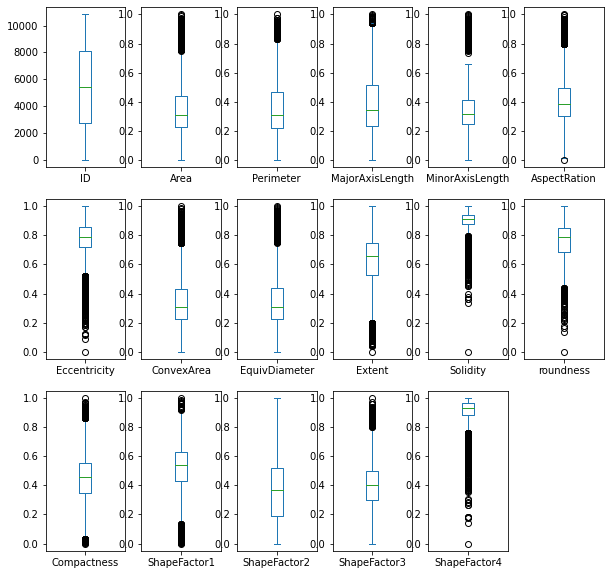

In [ ]:
# Dry_Beans_no_Y_ID= Dry_Beans.drop(columns=['ID','y'])

In [ ]:
# Dry_Beans_no_Y_ID_cols = Dry_Beans_no_Y_ID.columns
# sns.set(style='darkgrid')
# fig, ax_list = plt.subplots(nrows=4, ncols=4, sharey=False, figsize=(24,24))

# ax_list = ax_list.flatten()
# for name, ax in zip(Dry_Beans_no_Y_ID_cols, ax_list):
#      g = sns.histplot(Dry_Beans_no_Y_ID, x=name, bins=10, ax=ax).set(title=name)